# Assessing credit risk with machine learning methods

If you've ever applied for a mortgage, you know that financial firms process your information before making a decision. This is because giving you a mortgage can have a serious financial impact on their business. But how do they make a decision? In this assignment, you will have to prepare mortgage application data. After that, you will apply machine learning and business rules to reduce risk and ensure profitability. You will use a large set of mortgage data that emulates mortgage applications. You will be required to write the code in the boxes after each commented part. 

## Import and clean the data

As usual, the first step is to import and clean }the data. 

### Import the data

Ex 1: You have to first import the ***Data.csv*** file and consider the 'Id' column as the index of the dataframe. Hint: you need the ***pandas*** package to import the data. Once the data are uploaded, to have an idea of the data frame you are required to show the first 10 rows. 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Data.csv")
data

,id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,3,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,4,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,5,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,226063,5000,7.21,154.87,A,3 years,RENT,46000.0,Current,19.44,...,0.0,0.0,0.0,154.87,0.0,Individual,0.0,5618.0,37430.0,20200.0
226063,226064,35000,21.85,963.68,D,< 1 year,MORTGAGE,70000.0,Current,15.50,...,0.0,0.0,0.0,963.68,0.0,Individual,0.0,0.0,217083.0,9800.0
226064,226065,1200,18.99,43.99,D,1 year,RENT,90000.0,Fully Paid,23.15,...,0.0,0.0,0.0,1197.23,0.0,Individual,0.0,0.0,76125.0,42100.0
226065,226066,12000,8.90,381.04,A,< 1 year,OWN,35000.0,Fully Paid,25.38,...,0.0,0.0,0.0,9983.17,0.0,Individual,0.0,0.0,26386.0,43300.0


Ex 2: The variable we want to predict is ***loan_status***. In particular, we want to predict the probability that a mortgage is *Charged Off* from the bank book. Before doing anything, we need to check for the presence of missing data. Notice that the variable ***loan_status*** is a categorical variable. 

In [3]:
print(data.isnull().sum())

id                                 0
loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
a

Ex 3: Do we have any missing value for the ***loan_status*** variable? If yes, we should fix it by replacing with the most common category. If not, we should keep it as it is. To avoid any confusion in workflow. Let's save a back-up copy of the dataframe so that we can reuse it if something goes wrong. 

In [4]:
df_backup = data
df_backup

,id,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,dti,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1,18600,10.99,608.86,B,6 years,RENT,80000.0,Fully Paid,12.92,...,0.0,0.0,0.0,15705.09,0.0,Individual,0.0,0.0,170238.0,20700.0
1,2,2000,17.97,72.28,D,4 years,MORTGAGE,55400.0,Current,10.62,...,0.0,0.0,0.0,72.28,0.0,Joint App,0.0,74.0,351452.0,10800.0
2,3,12000,12.29,400.24,C,10+ years,OWN,60000.0,Fully Paid,17.92,...,0.0,0.0,0.0,11281.15,0.0,Individual,0.0,0.0,18207.0,20600.0
3,4,16000,19.42,589.90,D,7 years,RENT,64000.0,Current,3.90,...,0.0,0.0,0.0,589.90,0.0,Individual,0.0,0.0,12293.0,7800.0
4,5,22525,16.02,548.01,C,10+ years,MORTGAGE,94080.0,Fully Paid,19.08,...,0.0,0.0,0.0,21483.11,0.0,Individual,0.0,250.0,571244.0,53800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,226063,5000,7.21,154.87,A,3 years,RENT,46000.0,Current,19.44,...,0.0,0.0,0.0,154.87,0.0,Individual,0.0,5618.0,37430.0,20200.0
226063,226064,35000,21.85,963.68,D,< 1 year,MORTGAGE,70000.0,Current,15.50,...,0.0,0.0,0.0,963.68,0.0,Individual,0.0,0.0,217083.0,9800.0
226064,226065,1200,18.99,43.99,D,1 year,RENT,90000.0,Fully Paid,23.15,...,0.0,0.0,0.0,1197.23,0.0,Individual,0.0,0.0,76125.0,42100.0
226065,226066,12000,8.90,381.04,A,< 1 year,OWN,35000.0,Fully Paid,25.38,...,0.0,0.0,0.0,9983.17,0.0,Individual,0.0,0.0,26386.0,43300.0


### Cleaning the data

Ex 4: There are some other variable in which we do have many *NaN* though. We should clean the data to make sure there will not be any issue when predicting the mortgages which have been charged off. Let us do the cleaning as follows:

- Step 1: Take out from the dataset those variables in which we have more than 10 missing observations. 
- Step 2: Drop only the missing observations for those variables in which we have less than 10 *NaN*. 

In [5]:
# Step 1:
t = []
for i in data.columns:
    if data[[i]].isnull().sum().values <= 10:
        t.append(i)
        
df = data.loc[:,t]

# Step 2:

df.dropna(axis = 0)

,id,loan_amnt,int_rate,installment,grade,home_ownership,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,acc_now_delinq
0,1,18600,10.99,608.86,B,RENT,80000.0,Fully Paid,0.0,0.0,...,19955.750000,19955.75,18600.00,1355.75,0.0,0.0,0.0,15705.09,Individual,0.0
1,2,2000,17.97,72.28,D,MORTGAGE,55400.0,Current,1.0,2.0,...,212.850000,212.85,128.90,83.95,0.0,0.0,0.0,72.28,Joint App,0.0
2,3,12000,12.29,400.24,C,OWN,60000.0,Fully Paid,0.0,0.0,...,12485.960000,12485.96,12000.00,485.96,0.0,0.0,0.0,11281.15,Individual,0.0
3,4,16000,19.42,589.90,D,RENT,64000.0,Current,1.0,0.0,...,5864.480000,5864.48,3561.40,2303.08,0.0,0.0,0.0,589.90,Individual,0.0
4,5,22525,16.02,548.01,C,MORTGAGE,94080.0,Fully Paid,1.0,0.0,...,24751.116850,24751.12,22525.00,2226.12,0.0,0.0,0.0,21483.11,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226062,226063,5000,7.21,154.87,A,RENT,46000.0,Current,0.0,0.0,...,617.480000,617.48,503.83,113.65,0.0,0.0,0.0,154.87,Individual,0.0
226063,226064,35000,21.85,963.68,D,MORTGAGE,70000.0,Current,0.0,0.0,...,8588.150000,8588.15,3160.79,5427.36,0.0,0.0,0.0,963.68,Individual,0.0
226064,226065,1200,18.99,43.99,D,RENT,90000.0,Fully Paid,0.0,4.0,...,1238.692873,1238.69,1200.00,38.69,0.0,0.0,0.0,1197.23,Individual,0.0
226065,226066,12000,8.90,381.04,A,OWN,35000.0,Fully Paid,1.0,1.0,...,12650.445040,12650.45,12000.00,650.45,0.0,0.0,0.0,9983.17,Individual,0.0


Ex 5: Notice the variable of interest ***loan_status*** is a categorical variable, which means is a string. In order to run our classification algorithms we need to construct a quantitative (binary) variable which takes value 1 if the loan status is *charged off* and zero otherwise. Hint: we need the ***numpy*** package to do that. 

In [4]:
def dummy_replace(status):
    if status == "Charged Off":
        return 1
    else:
        return 0

In [3]:
import numpy as np
df["loan_dummy"] = df["loan_status"].apply(dummy_replace)

NameError: name 'df' is not defined

In [ ]:
df["loan_dummy"]


### Data visualization 

Ex 6: Before moving to the model estimation and assessment part, we want to have a sense of the data we are dealing with. For instance, let us look at the distribution of the loan amount (**loan_amnt**) and the interest rate (**int_rate**) by borrowers credit score (**grade**). The credit score goes from A (high grade) to F (low grade). Hint: use the ***seaborn*** and the ***matplotlib*** packages. 

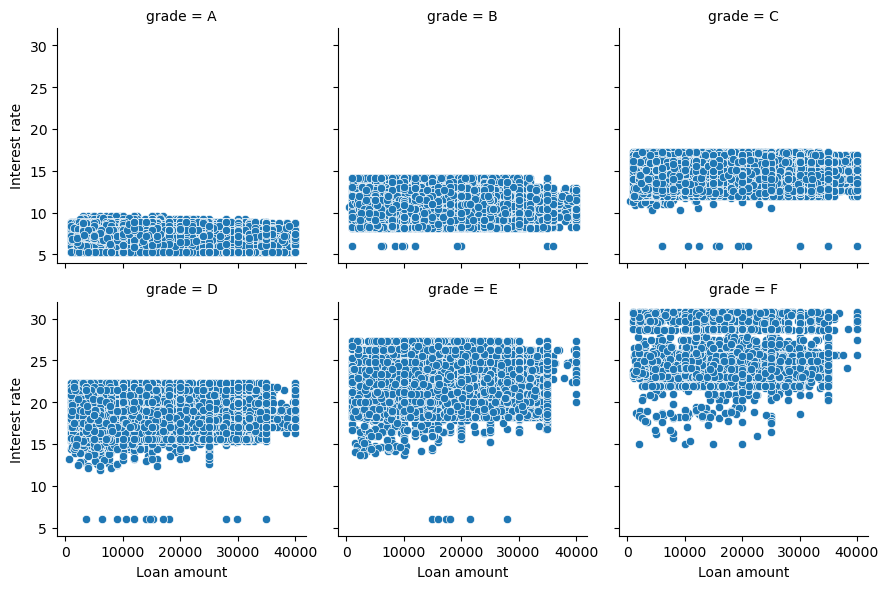

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

order_grade = ["A","B","C","D","E","F"]
g_dis = sns.FacetGrid(df.loc[:,["loan_amnt","int_rate","grade"]], col = "grade", col_order=order_grade, col_wrap=3,height=3)
g_dis.map(sns.scatterplot,"loan_amnt","int_rate" )
g_dis.set_axis_labels("Loan amount","Interest rate")

In [10]:
#The higher the grande (from A to F), the lower the interest

 Do you see any specific patterns? Briefly discuss the results.  

### Sample splitting 

Ex 7: Before estimating the logistic regression and other models, we need to split the sample in *training* vs *testing* observations. Let us consider 70% of the total data as training sample and the remaining as testing period. Notice we are dealing with a binary target variable, so we need to balance out the splitting accordingly. 

Notice the variables we want to use for forecasting are:

- Loan amount (**loan_amnt**)
- Interest rate (**int_rate**)
- Annual income (**annual_inc**)
- Total mortgage payment (**total_pymnt**)
- Mortgage installment (**installment**)
- Total paied in interest rates (**total_rec_int**)
- Last payment amount (**last_pymnt_amnt**)

We can construct our matrix of predictors *X* by taking these variables from the data frame. Recall that the variable of interest here is the binary variable **loan_dummy**. 

In [11]:
from sklearn.model_selection import train_test_split

X_title = ["loan_amnt", "int_rate", "annual_inc", "total_pymnt", "installment", "total_rec_int", "last_pymnt_amnt"]
Y = df['loan_dummy'].values
X = df[["loan_amnt", "int_rate", "annual_inc", "total_pymnt", "installment", "total_rec_int", "last_pymnt_amnt"]].values


In [12]:
X_title

['loan_amnt',
 'int_rate',
 'annual_inc',
 'total_pymnt',
 'installment',
 'total_rec_int',
 'last_pymnt_amnt']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.3)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
print(x_test)

[[-5.49101284e-01 -7.13628350e-02 -3.72982905e-02 ... -8.23787974e-01
  -7.02857977e-01  1.04480797e+00]
 [-1.20253429e+00 -1.18586560e+00 -1.98737636e-01 ... -1.20699486e+00
  -7.86976180e-01 -5.41777049e-01]
 [-7.66912286e-01 -1.43733144e-01 -5.71289971e-01 ... -6.69844390e-01
  -7.45616470e-01  6.62603020e-01]
 ...
 [ 9.75575730e-01 -6.52393032e-01  2.47937653e-02 ...  1.23162170e+00
  -1.37757284e-02 -4.33219859e-01]
 [-3.31290282e-01 -1.33680938e+00  1.73814699e-01 ... -2.89716380e-01
  -4.19793905e-01 -4.39738506e-01]
 [ 5.39953726e-01  5.22073700e-01 -4.30570216e-05 ...  1.37495838e-01
   2.11852753e+00 -4.81925847e-01]]


## Estimating a logistic regression 

Ex 8: We now estimate a logistic regression without shrinking the parameters. We estimate the regression using the *training* set of observations. 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Ex 9: We can now produce the forecast based on the observations in the testing sample. 

In [17]:
model_logis = LogisticRegression()
model_logis.fit(x_train,y_train)

LogisticRegression()

In [18]:
#Predict yhat by the training model 
y_pre_logis = model_logis.predict(x_test)
y_pre_logis

array([0, 0, 0, ..., 0, 0, 0])

Ex 10a: Calculate the confusion matrix

In [19]:
# Confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pre_logis))

[[59498   516]
 [ 7559   248]]


In [46]:
#sensitivity, recall, hit rate, or true positive rate (TPR)
print(59498/(59498+516))
#specificity, selectivity or true negative rate (TNR)
print(248/(248+7559))

0.9914020061985537
0.031766363519918024


In [21]:
# The logistic model predicted very precisely the true positive case (99.14%) while predicting  poorly true negative case (3.17%)
# It means that the model preferred sensitivity above specificity (actually, the threshold is about 0.5). 
# It is reasonable in this situation because we want to reduce the case of Fail negative rate, which can harm the company's financial health directly

Can you give a comment on the confusion matrix? 

Ex 10b: Calculate now the forecast from a "no-skill" prediction, that is just taking the majority class. 

In [1]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# generate the predicted probabilities from the logistic regression
y_probs_logis = model_logis.predict_proba(x_test)[:,-1]

NameError: name 'y_test' is not defined

Ex 10c: Now compare the logistic regression with the "no-skill" prediction based on the ROC curve. Hint: you need to use the **sklearn.metrics** and the **matplotlib.pyplot** packages. 

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, y_probs_logis)
auc_logis = roc_auc_score(y_test,y_probs_logis)

fpr_random, tpr_random, thresholds_random = roc_curve(y_test, ns_probs)
auc_random = roc_auc_score(y_test,ns_probs)

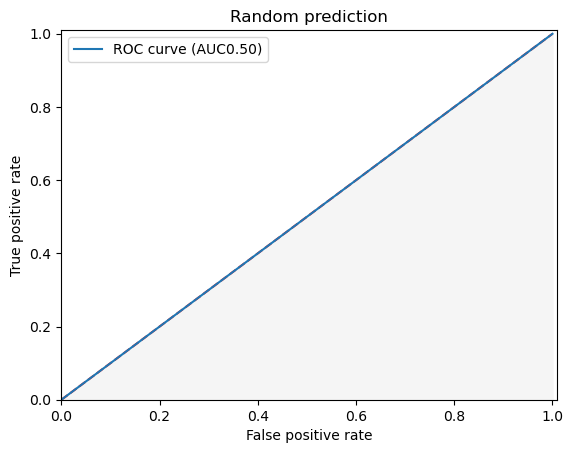

In [24]:
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_random,tpr_random, label = "ROC curve (AUC%0.2f)"%auc_random)
plt.fill_between(fpr_random,tpr_random, color = "whitesmoke")
plt.title("Random prediction")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

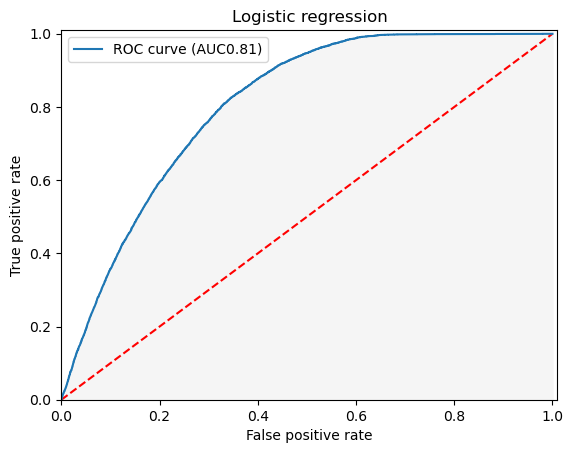

In [25]:
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_logis,tpr_logis, label = "ROC curve (AUC%0.2f)"%auc_logis)
plt.fill_between(fpr_logis,tpr_logis, color = "whitesmoke")
plt.title("Logistic regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

Can you comment on the results?

In [26]:
# The logistic regression model is better than no-skill prediction since AUC (0.81) of the model is bigger than 0.5. 

## Estimating a classification tree

We now implement a classification tree to forecast mortgage defaults. We implement two different procedures. 

- 1. Classification tree with **max_depth** fixed
- 2. Classificarion tree with **max_depth** estimated by k-fold cross validation. 

Ex 11: Let start with a simple classification tree:

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
model_tree.fit(x_train,y_train)
y_pre_tree = model_tree.predict(x_test)

Ex 12: Now compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

In [28]:
y_probs_tree = model_tree.predict_proba(x_test)[:,1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_probs_tree)
auc_tree = roc_auc_score(y_test,y_probs_tree)


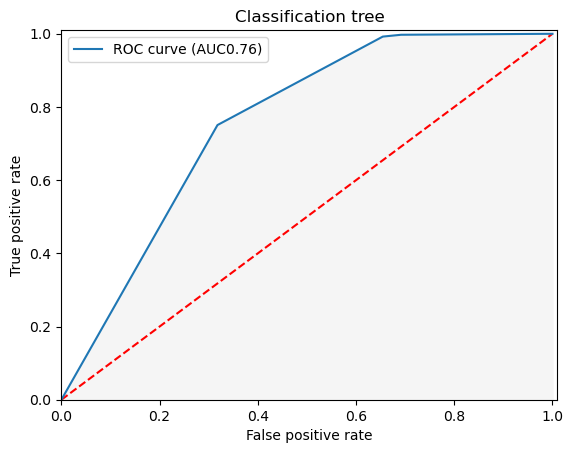

In [29]:
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_tree,tpr_tree, label = "ROC curve (AUC%0.2f)"%auc_tree)
plt.fill_between(fpr_tree,tpr_tree, color = "whitesmoke")
plt.title("Classification tree")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

In [30]:
# The classification tree is better than no-skill prediction since the AUC is 0.75 (higher than 0.5).
# Nevertheless, the classification tree had poorer performance when compared with logistic regression (0.71 < 0.81)

Can you comment on the results? 

Ex 13: Let now re-calculate a classification tree but with the **max_depth** and the **min_samples_leaf** parameters estimated by a 5-fold cross-validation method. 

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
params_dt = {'max_depth': [2,3,4,6],
             'min_samples_leaf': [1, 1.5, 2]}

classification_tree = DecisionTreeClassifier()

cross_validation_tree = GridSearchCV(classification_tree, param_grid = params_dt, cv = 5)
cross_validation_tree.fit(x_train,y_train)



/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/dragonsave/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 242, in fit
    raise ValueError(
ValueError: m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 6],
                         'min_samples_leaf': [1, 1.5, 2]})

In [32]:
best_max_depth = cross_validation_tree.best_estimator_.max_depth
best_min_samples_split = cross_validation_tree.best_estimator_.min_samples_split
print(best_max_depth)
print(best_min_samples_split)

best_model_tree = DecisionTreeClassifier(max_depth= best_max_depth, min_samples_split = best_min_samples_split)
best_model_tree.fit(x_train,y_train)
y_best_tree = best_model_tree.predict(x_test)


6
2


Ex 14: Now compare the classification tree with and without cross validation against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

In [33]:
# generate the predicted probabilities from the logistic regression
y_probs_best_tree = best_model_tree.predict_proba(x_test)[:,-1]
fpr_best_tree, tpr_best_tree, thresholds_best_tree = roc_curve(y_test, y_probs_best_tree)
auc_best_tree = roc_auc_score(y_test,y_probs_best_tree)


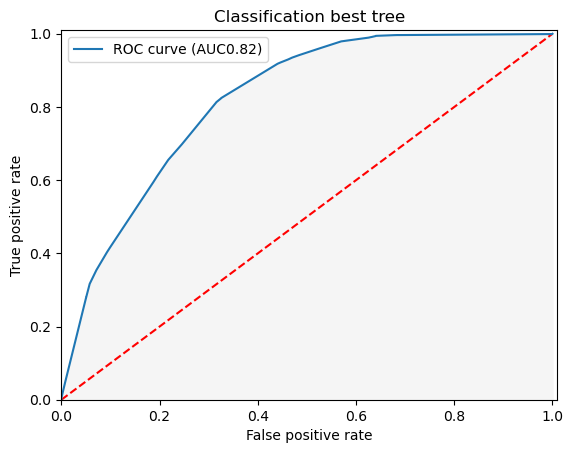

In [34]:
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_best_tree,tpr_best_tree, label = "ROC curve (AUC%0.2f)"%auc_best_tree)
plt.fill_between(fpr_best_tree,tpr_best_tree, color = "whitesmoke")
plt.title("Classification best tree")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

Can you comment on the results?

In [35]:
# The classification tree with max_depth estimated by k-fold cross validation outperformance the normal 
# Classification tree and no-skill prediction (0.82 > 0.75 > 0.5)

## Estimating a random forest 

Ex 15: We now expand the set of models and include a random forest. The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default. Let us assume the number of estimators (**n_estimators**) equal to 10. 

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators = 10)
model_forest.fit(x_train,y_train)

y_forest = model_forest.predict(x_test)

Ex 16: Now compare the random forest against the classification tree, with and without cross validation, the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

In [37]:
# generate the predicted probabilities from the logistic regression
y_probs_forest = model_forest.predict_proba(x_test)[:,-1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_probs_forest)
auc_forest = roc_auc_score(y_test, y_probs_forest)

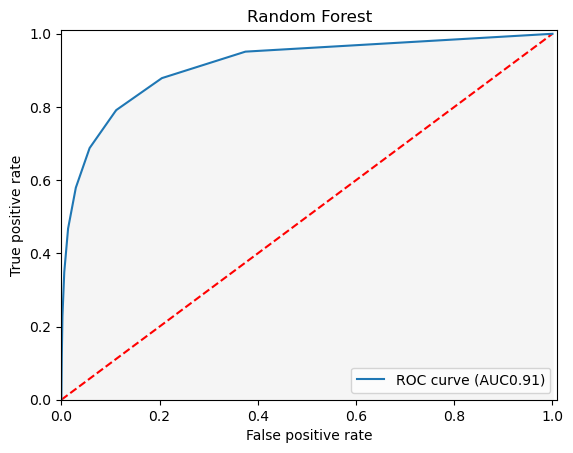

In [38]:
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr_forest,tpr_forest, label = "ROC curve (AUC%0.2f)"%auc_forest)
plt.fill_between(fpr_forest,tpr_forest, color = "whitesmoke")
plt.title("Random Forest")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

Can you comment on the results?

In [39]:
#Random forest is the model that had highest AUC with 0.91. It mean that the model is the most efficent model. 

Ex 17: Let us now look at the relative importance of each of the predictors used based on a *permutation importance* algorithm. 

In [40]:
from sklearn.inspection import permutation_importance
premu_important = permutation_importance(model_forest, x_test, y_test)

In [41]:
for i in range(len(X_title)):
    print("%s: %.3f" % (X_title[i], premu_important.importances_mean[i]))

loan_amnt: 0.053
int_rate: 0.101
annual_inc: 0.007
total_pymnt: 0.075
installment: 0.094
total_rec_int: 0.061
last_pymnt_amnt: 0.052


In [42]:
premu_important.importances_mean

array([0.05260907, 0.10095398, 0.00744902, 0.07507999, 0.09418322,
       0.0610106 , 0.05233777])

Can you comment on the results?

<BarContainer object of 7 artists>

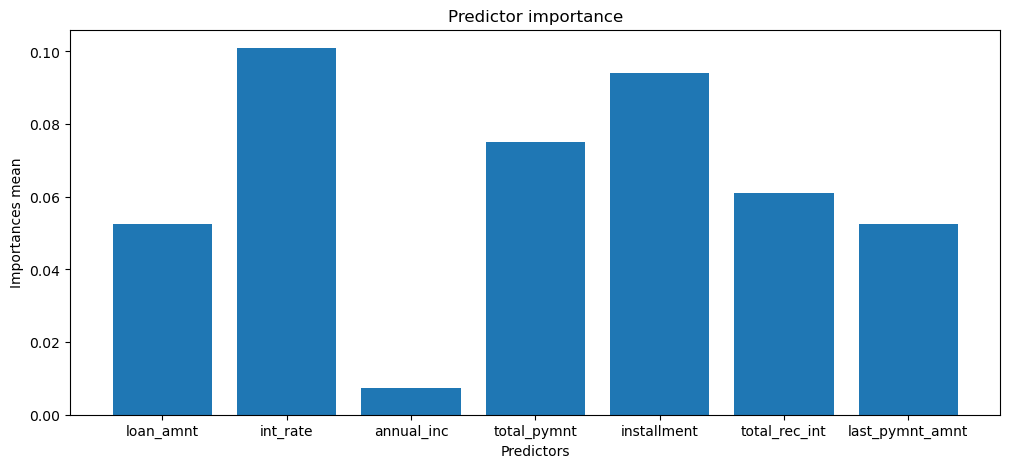

In [43]:
plt.figure(figsize=(12,5))
plt.title("Predictor importance")
plt.ylabel("Importances mean")
plt.xlabel("Predictors")
plt.bar(X_title, premu_important.importances_mean,)

In [44]:
#comment
#The interest rate is the independent variable that had the highest importance index while annual income played the smallest
#role. In detail, all factors but annual income were above 0.5 importance mean index. 

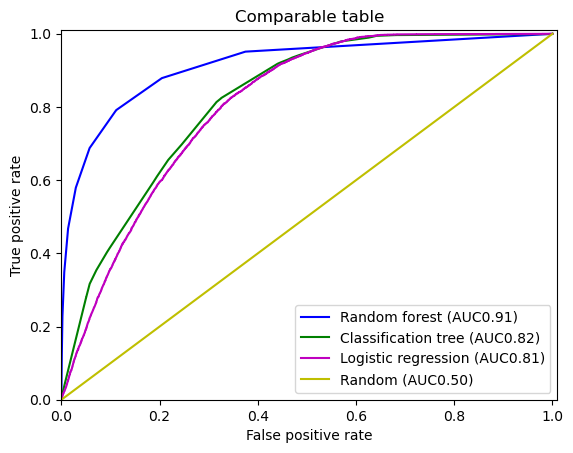

In [45]:
#Comparing curve of the models 
%matplotlib inline
plt.figure()
plt.xlim([0.0,1.01])
plt.ylim([0.0,1.01])
plt.plot(fpr_forest,tpr_forest, label = "Random forest (AUC%0.2f)"%auc_forest, color = "b")
plt.plot(fpr_best_tree,tpr_best_tree, label = "Classification tree (AUC%0.2f)"%auc_best_tree, color = "g")
plt.plot(fpr_logis,tpr_logis, label = "Logistic regression (AUC%0.2f)"%auc_logis, color = "m")
plt.plot(fpr_random,tpr_random, label = "Random (AUC%0.2f)"%auc_random, color = "y")
plt.title("Comparable table")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()